<a href="https://colab.research.google.com/github/renzodamgo/UPC-PDI-CC61/blob/main/TF_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO FINAL DE PROCESAMIENTO DIGITAL DE IMÁGENES**

![](https://i.imgur.com/mpXdQd1.png)

**Profesor:**
- Pablo Alejandro Fonseca Arroyo

**Seccion:**
- CC61


**Integrantes:**
- Renzo Damián
- Renzo Mondragón


## 1. Descargar un video desde un enlace de youtube



### 1.1 Instalación de libreria

In [1]:
!pip install youtube_dl

### 1.2 Función para descargar de Youtube

In [27]:
import youtube_dl

def downloadYT(url):
    def myHook(d):
        if d['status'] == 'finished':
            print(f"[{d['status']}] Done downloading, now converting ...")
    ydl_opts = {
        'format': 'best[height=720]',
        'outtmpl': '%(id)s.%(ext)s',
        'progress_hooks': [myHook],
    }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        meta = ydl.extract_info(url,download=False)
        ydl.download([url])
    filename = meta['id']+"."+meta['ext']
    fps = meta['fps']
    return filename, fps

### 1.3 Descarga de video de un enlace
"Lima 2019: Gladys Tejeda logró así la medalla de oro"


In [28]:
filename, fps = downloadYT("https://www.youtube.com/watch?v=QPXQlU7k6bQ")
print("Download finished:", filename)

[youtube] QPXQlU7k6bQ: Downloading webpage
[youtube] QPXQlU7k6bQ: Downloading MPD manifest
[youtube] QPXQlU7k6bQ: Downloading webpage
[youtube] QPXQlU7k6bQ: Downloading MPD manifest
[download] QPXQlU7k6bQ.mp4 has already been downloaded
[download] 100% of 38.48MiB
[finished] Done downloading, now converting ...
Download finished: QPXQlU7k6bQ.mp4


## 2. Lectura de video

In [29]:
!pip install sk-video

In [30]:
from skvideo.io import vreader

def framesFromVideo(filename,fps,seconds):
    videogen = vreader(filename)
    frames = []
    for frame in videogen:
        frames.append(frame)
        if len(frames) > fps*seconds:
            break
    return frames

In [35]:
frames[1].shape

(1080, 1920, 3)

In [34]:
import matplotlib.pyplot as plt

seconds = 30
frames= framesFromVideo(filename,fps,seconds)

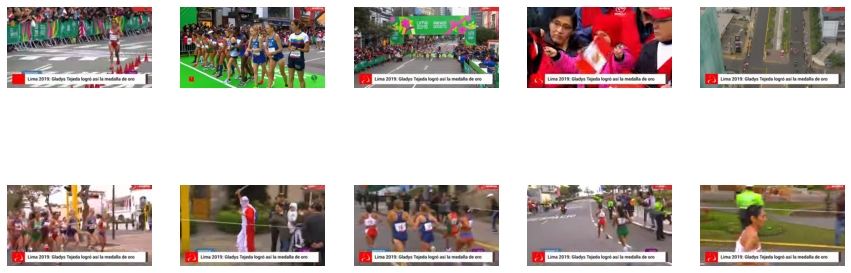

In [26]:
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(frames[int((len(frames)/10)*i-1)])

In [8]:
import platform
import subprocess

#print((subprocess.check_output("lscpu",shell=True).strip()).decode())

platform.platform()

'Linux-5.4.109+-x86_64-with-Ubuntu-18.04-bionic'

In [ ]:
from skvideo.io import vreader

videogen = vreader(filename)
f = list(videogen)

In [9]:
fps

30